# Tasks
- No columns were removed due to null values
- No columns were removed due to correlation
- RFECV applied on each of the models separately based on `accuracy`
- `MinMaxScaler` was used for scaling

|Model Name            |No. of Features for Elimination|Feature Name     |Ranking|Threshold|Importance|
|:--------------------:|:-----------------------------:|:----------------|:-----:|:-------:|:--------:|
|Random Forest         |1                              |                 |       |0.01     |          |
|                      |                               |1. race          |1      |         |0.009714  |
|Logistic Regression   |0                              |                 |       |0.01     |          |
|Support Vector Machine|4                              |                 |       |0.001    |          |
|                      |                               |1. education     |4      |         |-0.000315 |
|                      |                               |2. native-country|2      |         |-0.000066 |
|                      |                               |3. fnlwgt        |3      |         |0.000012  |
|                      |                               |4. race          |1      |         |0.000911  |
|Decision Tree         |1                              |                 |       |0.01     |          |
|                      |                               |1. race          |2      |         |---       |
|LightGBM              |3                              |                 |       |100      |          |
|                      |                               |1. race          |1      |         |37        |
|                      |                               |2. gender        |1      |         |40        |
|                      |                               |3. native-country|1      |         |63        |
|Gradient Boosting     |3                              |                 |       |0.01     |          |
|                      |                               |1. native-country|2      |         |---       |
|                      |                               |2. race          |1      |         |0.000078  |
|                      |                               |3. fnlwgt        |1      |         |0.000460  |
|ADA Boost             |1                              |                 |       |---      |          |
|                      |                               |1. fnlwgt        |2      |         |---       |
|XG Boost              |3                              |                 |       |0.01     |          |
|                      |                               |1. fnlwgt        |1      |         |0.005521  |
|                      |                               |2. race          |1      |         |0.008002  |
|                      |                               |3. native-country|1      |         |0.008268  |

- RFECV could not be applied on
    - *Naive Bayes*
    - *K-Neighbors*
    - *Bagging*


- Balance the dataset to `average` of majority and minority classes
    - Smote for `Uplsampling`
    - Tomek for `downsampling`
    - `RandomUnderSampling` to decrease more from majority class
- Split the dataset `70-30` ratio
- Null values have been replaced with `mean`

# Import Libraries

In [35]:
import pandas as pd
import numpy as np
import my_packages as mypckg
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

%matplotlib inline

# Dataset

In [36]:
df = pd.read_csv('../data/adult.csv', na_values="?", skipinitialspace=True)

## Categorical Data Encoding

In [37]:
# encode the dataset
df , mappings = mypckg.encoder(df)

In [38]:
mypckg.show(mappings)

{
    "workclass": {
        "Private": 0,
        "Local-gov": 1,
        "Self-emp-not-inc": 2,
        "Federal-gov": 3,
        "State-gov": 4,
        "Self-emp-inc": 5,
        "Without-pay": 6,
        "Never-worked": 7
    },
    "education": {
        "11th": 0,
        "HS-grad": 1,
        "Assoc-acdm": 2,
        "Some-college": 3,
        "10th": 4,
        "Prof-school": 5,
        "7th-8th": 6,
        "Bachelors": 7,
        "Masters": 8,
        "Doctorate": 9,
        "5th-6th": 10,
        "Assoc-voc": 11,
        "9th": 12,
        "12th": 13,
        "1st-4th": 14,
        "Preschool": 15
    },
    "marital-status": {
        "Never-married": 0,
        "Married-civ-spouse": 1,
        "Widowed": 2,
        "Divorced": 3,
        "Separated": 4,
        "Married-spouse-absent": 5,
        "Married-AF-spouse": 6
    },
    "occupation": {
        "Machine-op-inspct": 0,
        "Farming-fishing": 1,
        "Protective-serv": 2,
        "Other-service": 3,
        

## Feature and Target Separation

In [39]:
X = df.drop('income', axis=1)
y = df['income']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [40]:
print(X)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        0.0  226802          0                7               0   
1       38        0.0   89814          1                9               1   
2       28        1.0  336951          2               12               1   
3       44        0.0  160323          3               10               1   
4       18        NaN  103497          3               10               0   
...    ...        ...     ...        ...              ...             ...   
48837   27        0.0  257302          2               12               1   
48838   40        0.0  154374          1                9               1   
48839   58        0.0  151910          1                9               2   
48840   22        0.0  201490          1                9               0   
48841   52        5.0  287927          1                9               1   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [41]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


## Splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(34189, 14)
(34189,)
(14653, 14)
(14653,)


# Finding and Removing Null Values

In [43]:
mv_train = X_train.isnull().sum()
mv_train

age                   0
workclass          1969
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1977
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      585
dtype: int64

In [44]:
mv_test = X_test.isnull().sum()
mv_test

age                  0
workclass          830
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         832
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     272
dtype: int64

In [45]:
# Percentage of missing values
mv_train_prcnt = (mv_train/X_train.isnull().count())
missing_data_train = pd.concat([mv_train, mv_train_prcnt], axis=1, keys=['Total', 'Percent'])
missing_data_train

,Total,Percent
age,0,0.000000
workclass,1969,0.057592
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
occupation,1977,0.057826
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000


In [46]:
mv_test_prcnt = (mv_test/X_test.isnull().count())
missing_data_test = pd.concat([mv_test, mv_test_prcnt], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
age,0,0.000000
workclass,830,0.056644
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
occupation,832,0.056780
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000


## Visualizing missing values

<Axes: >

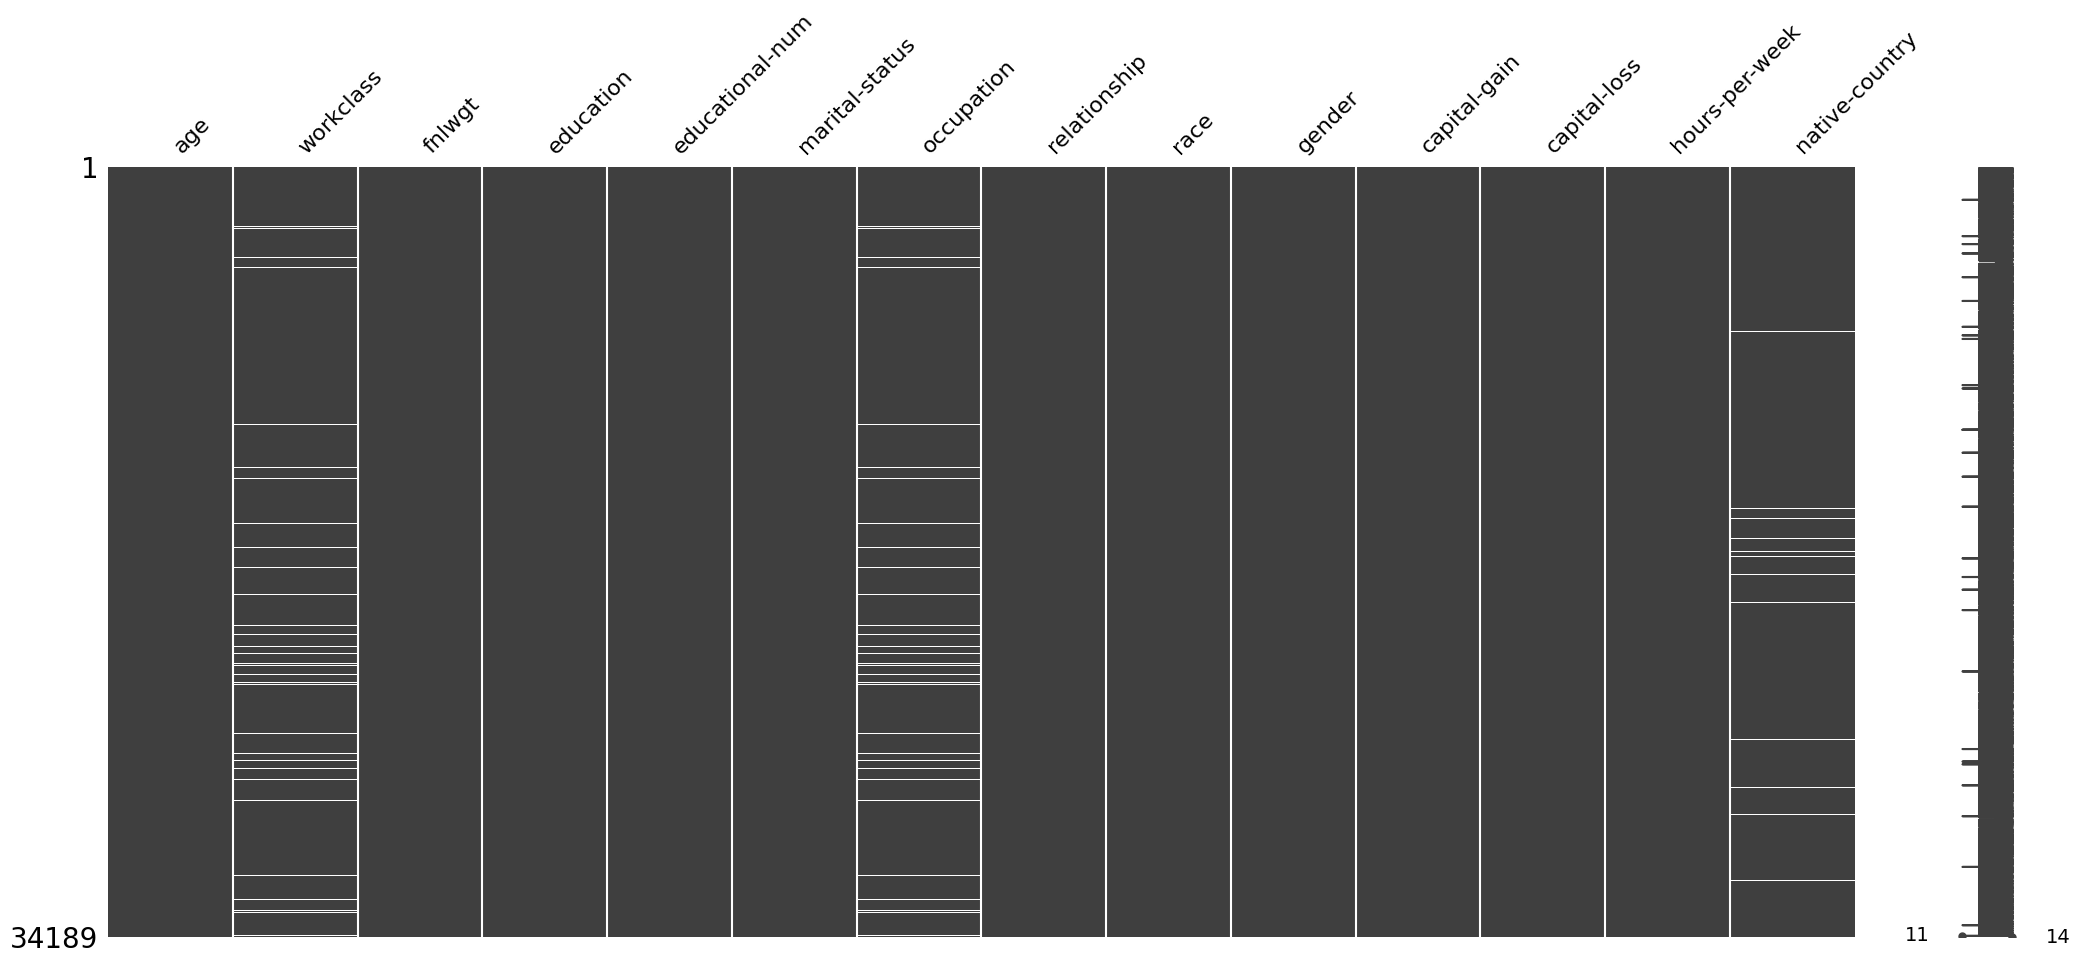

In [47]:
msno.matrix(X_train)

<Axes: >

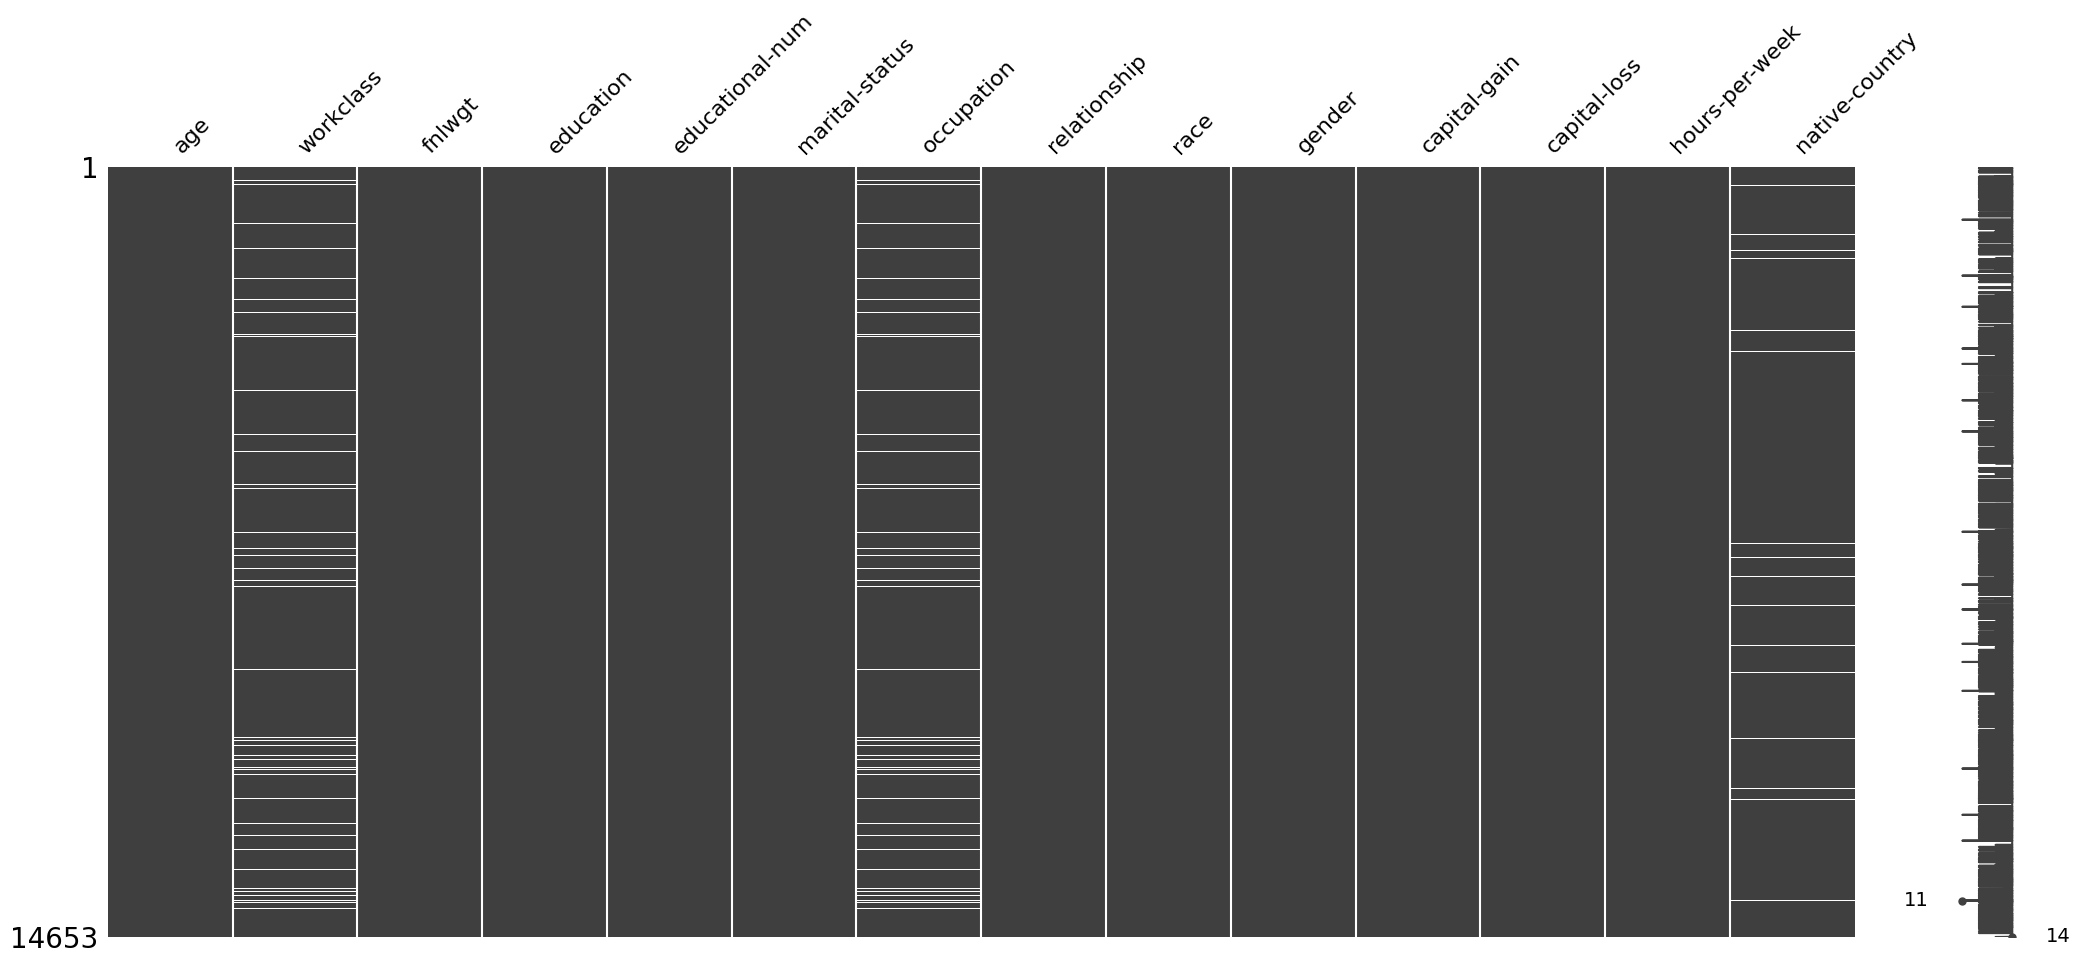

In [48]:
msno.matrix(X_test)

## Dropping columns with 30% or more missing values

In [49]:
percentage = 30
min_train = int(((100-percentage)/100)*X_train.shape[0])
min_test = int(((100-percentage)/100)*X_test.shape[0])

print(min_train, X_train.shape[0])
print(min_test, X_test.shape[0])

23932 34189
10257 14653


In [50]:
X_train.dropna(axis=1, thresh=min_train, inplace=True)
X_test.dropna(axis=1, thresh=min_test, inplace=True)

print(X_train.shape, X_test.shape)

(34189, 14) (14653, 14)


### *`No Columns were dropped as all the columns have more than 70% data`*

## Fill up other data with mean of X_train

In [51]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


In [52]:
X_test.fillna(X_train.mean(), inplace=True)
print(X_test.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64


# Allign the y_train and y_test according to the indecies of X_train and X_test

In [53]:
y_train = y_train.loc[X_train.index]
y_test= y_test.loc[X_test.index]

# Pearson's Correlation

<Axes: >

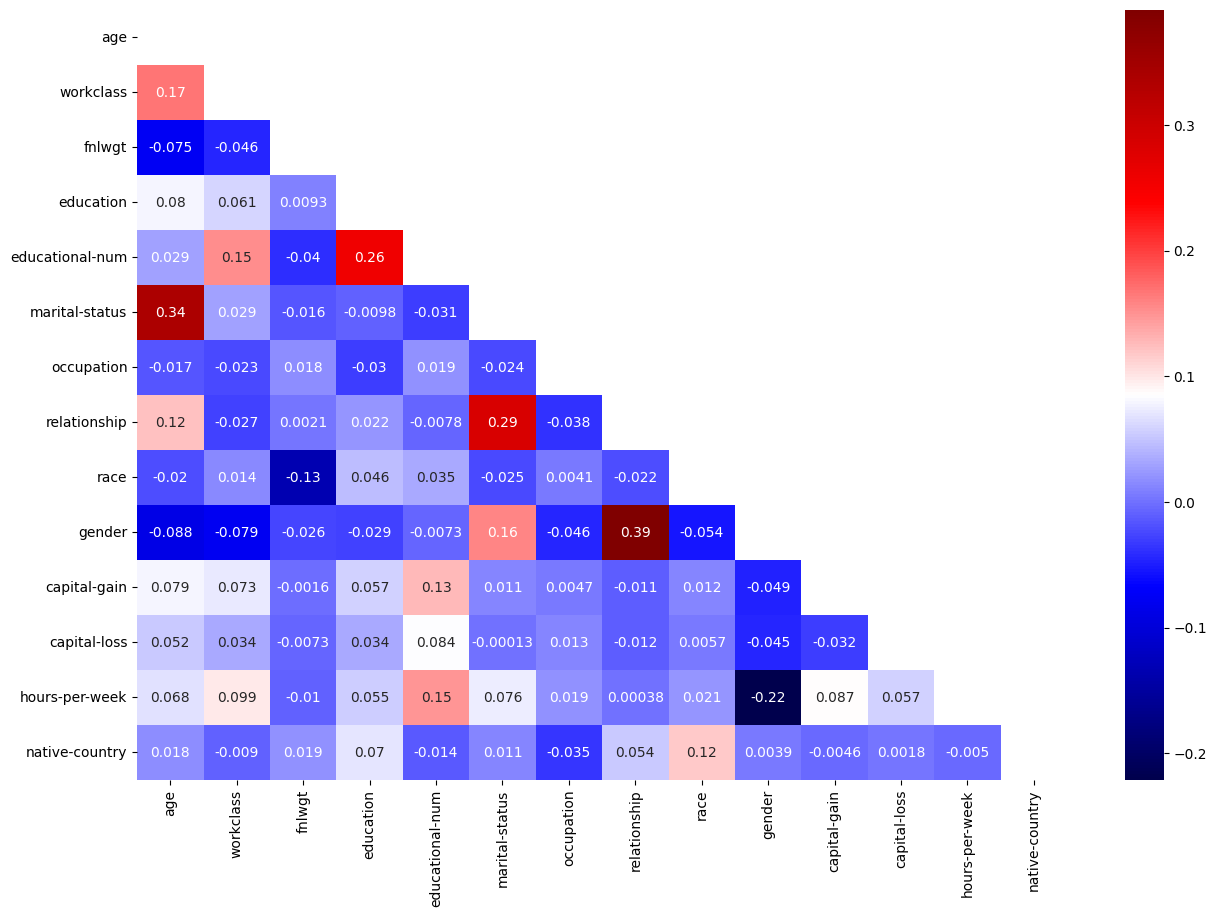

In [54]:
corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='seismic', mask=mask1)

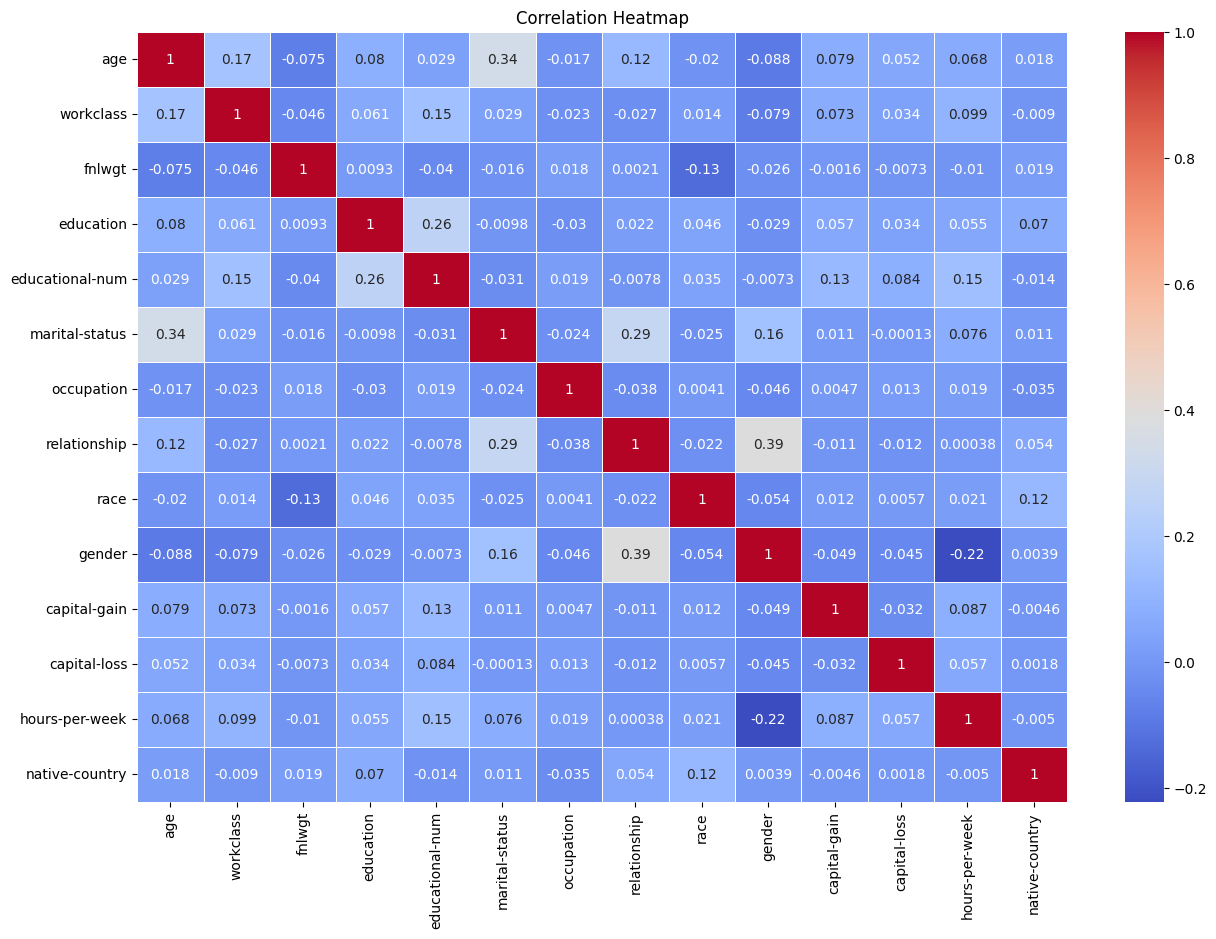

In [55]:
# correlation heatmap
plt.figure(figsize=(15,10))
correlation_matrix = X_train.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

## High Correlation Removal

In [56]:
def high_correlation(dataset, threshold):
    col_corr = set() # set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = high_correlation(X_train, 0.80) 
print(len(corr_features))
print(corr_features)

0
set()


### *`No Correlation is more than 80%`*

# Balance the Dataset

In [58]:
y_train.describe()

count    34189.000000
mean         0.241803
std          0.428182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [59]:
y_train.shape

(34189,)

In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34189 entries, 42392 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
34189 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


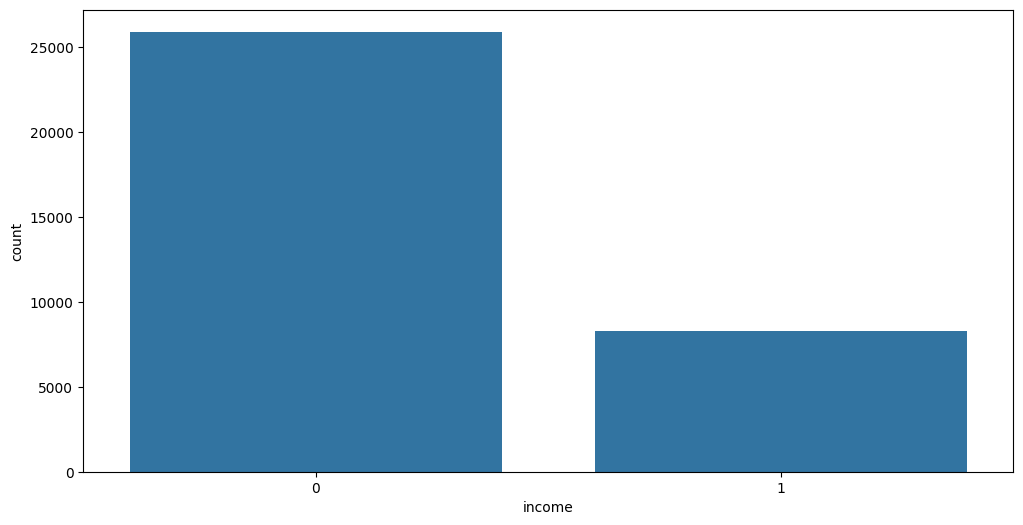

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

In [62]:
y_train.value_counts()

income
0    25922
1     8267
Name: count, dtype: int64

In [63]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTE(random_state=42)
tomek = TomekLinks()

smote_tomek = SMOTETomek(sampling_strategy=1, smote=smote, tomek=tomek, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

print(f"Y main: {Counter(y_train)}")
print(f"Y resampled: {Counter(y_train)}")

Y main: Counter({0: 25922, 1: 25441})
Y resampled: Counter({0: 25922, 1: 25441})


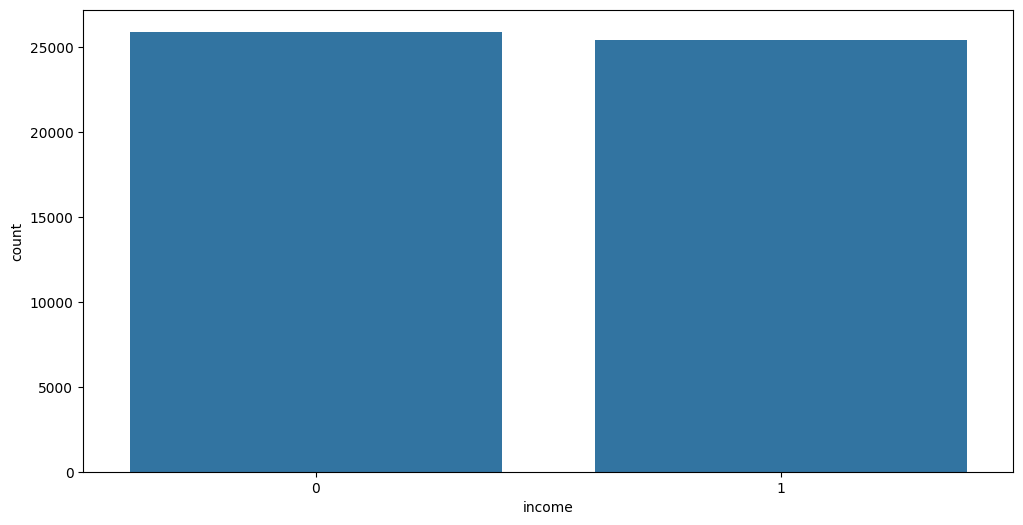

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

# Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_train)

In [66]:
print(X_scaled)

[[0.10958904 0.         0.11985846 ... 0.         0.39795918 0.        ]
 [0.64383562 0.         0.18639179 ... 0.         0.16326531 0.        ]
 [0.16438356 0.         0.16402657 ... 0.         0.39795918 0.8       ]
 ...
 [0.5890411  0.         0.19133875 ... 0.         0.45918367 0.09170025]
 [0.60273973 0.13081032 0.13136673 ... 0.         0.28571429 0.        ]
 [0.68493151 0.1149724  0.06402453 ... 0.         0.48979592 0.        ]]


# RFECV Feature Selection

In [67]:
from sklearn.feature_selection import RFECV

## RandomForestClassifier

### Apply RFECV

In [68]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV with the random forest classifier
rfecv = RFECV(estimator=rf_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv.fit(X_scaled, y_train)

# the ranking of features
print(select.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Best features

In [69]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  14
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


### Feature Importance

In [70]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Create a pandas DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
    'Importance': select.estimator_.feature_importances_
})

# Sort the DataFrame based on the Importance
feature_ranking_df.sort_values(by='Importance', ascending=True, inplace=True)

# Print the feature rankings
print(feature_ranking_df)

            Feature  Ranking  Importance
8              race        1    0.009714
13   native-country        1    0.013350
11     capital-loss        1    0.018160
1         workclass        1    0.048877
3         education        1    0.059195
9            gender        1    0.067113
10     capital-gain        1    0.070115
7      relationship        1    0.075239
4   educational-num        1    0.080802
6        occupation        1    0.091504
2            fnlwgt        1    0.097071
12   hours-per-week        1    0.098815
5    marital-status        1    0.104559
0               age        1    0.165485


### Below Threshold

In [71]:
# Define your threshold value
threshold_value = 0.01

# Find features with importance less than or equal to the threshold value
less_important_features = feature_ranking_df[feature_ranking_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (0.01):
Less Important Features: ['race']


## Logistic Regression

### Apply RFECV

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression classifier
log_reg = LogisticRegression(random_state=42)

# Initialize RFECV with the logistic regression classifier
rfecv = RFECV(estimator=log_reg, step=1, min_features_to_select=5, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Best features

In [73]:
features = np.array(X_train.columns)

mask = select.support_
best_features = X_train.columns[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  14
Best features:  Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


### Feature Importance

In [103]:
# Fit the logistic regression model only on the selected features
log_reg.fit(X_scaled[:, mask], y_train)

# Get the coefficients of the logistic regression model
coefficients = log_reg.coef_[0]

# Create a pandas DataFrame to display feature rankings and coefficients
feature_ranking_df = pd.DataFrame({
    'Feature': best_features,
    'Ranking': select.ranking_[mask],
    'Coefficient': coefficients
})

# Sort the DataFrame based on the absolute value of the Coefficient
feature_ranking_df.sort_values(by='Coefficient', key=abs, ascending=True, inplace=True)

# Print the feature rankings
print(feature_ranking_df)

            Feature  Ranking  Coefficient
3         education        1    -0.017727
2            fnlwgt        1     0.109959
7      relationship        1     0.123218
13   native-country        1     0.171375
6        occupation        1     0.446333
1         workclass        1     0.452770
8              race        1    -0.880451
5    marital-status        1    -1.089640
9            gender        1    -2.174083
11     capital-loss        1     2.856121
12   hours-per-week        1     3.567588
0               age        1     3.764700
4   educational-num        1     5.019245
10     capital-gain        1    22.128587


## Support Vector Machine

### Apply RFECV

In [75]:
from sklearn.svm import SVC

# Initialize an SVM classifier
svc = SVC(kernel='linear', random_state=42)

# Initialize RFECV with the SVM classifier
rfecv = RFECV(estimator=svc, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[1 1 3 4 1 1 1 1 1 1 1 1 1 2]


### Best features

In [76]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  11
Best features:  ['age' 'workclass' 'educational-num' 'marital-status' 'occupation'
 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week']


Features in all features but not in best features:  3
Features in all features but not in best features:  ['education' 'fnlwgt' 'native-country']


In [77]:
# Get the support mask
mask = select.get_support()
best_features = np.array(X_train.columns)[mask]

print("Best features: ", best_features)

Best features:  ['age' 'workclass' 'educational-num' 'marital-status' 'occupation'
 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week']


### Param Importance

In [78]:
from sklearn.inspection import permutation_importance

# Fit the SVM to the training data
svc.fit(X_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [79]:
# Perform permutation importance
perm_importance = permutation_importance(svc, X_scaled, y_train, random_state=42)

In [80]:
# Create a pandas DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame based on the Importance
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Print the feature importances
print(feature_importance_df)

            Feature  Importance
3         education   -0.000315
13   native-country   -0.000066
2            fnlwgt    0.000012
8              race    0.000911
7      relationship    0.001133
1         workclass    0.001285
6        occupation    0.001561
5    marital-status    0.003606
11     capital-loss    0.006678
12   hours-per-week    0.020123
10     capital-gain    0.032681
0               age    0.054572
4   educational-num    0.067882
9            gender    0.068306


### Below Threshold

In [81]:
# Define your threshold value
threshold_value = 0.001

# Find features with importance less than or equal to the threshold value
less_important_features = feature_importance_df[feature_importance_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (0.001):
Less Important Features: ['education', 'native-country', 'fnlwgt', 'race']


## Decision Tree

### Apply RFECV

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize RFECV with the decision tree classifier
rfecv_dt = RFECV(estimator=dt_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv_dt.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1]


### Best features

In [83]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  13
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['race']


### Feature Importance

In [86]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Create a pandas DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
})

# Initialize the 'Importance' column with NaNs
feature_ranking_df['Importance'] = np.nan

# Fill in the 'Importance' column only for the selected features
selected_features_mask = select.support_
feature_ranking_df.loc[selected_features_mask, 'Importance'] = select.estimator_.feature_importances_

# Sort the DataFrame based on the 'Importance' column, dropping NaN values
feature_ranking_df_sorted = feature_ranking_df.dropna().sort_values(by='Importance', ascending=True)

# Print the sorted feature rankings
print(feature_ranking_df_sorted)


            Feature  Ranking  Importance
13   native-country        1    0.010771
11     capital-loss        1    0.016686
1         workclass        1    0.028052
7      relationship        1    0.040364
3         education        1    0.052548
5    marital-status        1    0.055024
12   hours-per-week        1    0.064762
10     capital-gain        1    0.068823
4   educational-num        1    0.094067
6        occupation        1    0.105314
2            fnlwgt        1    0.112860
9            gender        1    0.118385
0               age        1    0.232345


### Below Threshold

In [87]:
# Define your threshold value
threshold_value = 0.01

# Find features with importance less than or equal to the threshold value
less_important_features = feature_ranking_df[feature_ranking_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (0.01):
Less Important Features: []


## Lightgbm

### Apply RFECV

In [88]:
from lightgbm import LGBMClassifier

# Initialize a LightGBM classifier
lgbm_clf = LGBMClassifier(random_state=42)

# Initialize RFECV with the LightGBM classifier
rfecv_lgbm = RFECV(estimator=lgbm_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv_lgbm.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[LightGBM] [Info] Number of positive: 20353, number of negative: 20737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 41090, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495327 -> initscore=-0.018691
[LightGBM] [Info] Start training from score -0.018691
[LightGBM] [Info] Number of positive: 20353, number of negative: 20737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 41090, number of used features: 13
[LightGBM] [Info] 

### Best features

In [89]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  14
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


### Feature Importance

In [90]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Create a pandas DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
    'Importance': select.estimator_.feature_importances_
})

# Sort the DataFrame based on the Importance
feature_ranking_df.sort_values(by='Importance', ascending=True, inplace=True)

# Print the feature rankings
print(feature_ranking_df)

            Feature  Ranking  Importance
8              race        1          37
9            gender        1          40
13   native-country        1          63
7      relationship        1         155
3         education        1         165
5    marital-status        1         199
4   educational-num        1         203
12   hours-per-week        1         225
11     capital-loss        1         242
1         workclass        1         247
2            fnlwgt        1         250
0               age        1         285
10     capital-gain        1         297
6        occupation        1         592


### Below Threshold

In [91]:
# Define your threshold value
threshold_value = 100

# Find features with importance less than or equal to the threshold value
less_important_features = feature_ranking_df[feature_ranking_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (100):
Less Important Features: ['race', 'gender', 'native-country']


## Gradient Boosting

### Apply RFECV

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# RFECV with the gradient boosting classifier
rfecv_gb = RFECV(estimator=gb_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv_gb.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2]


### Best features

In [93]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  13
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['native-country']


### Feature Importance

In [94]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Check if the estimator has the attribute 'feature_importances_'
if hasattr(select.estimator_, 'feature_importances_'):
    # Get the feature importances
    feature_importances = select.estimator_.feature_importances_
    
    # Get the mask of selected features
    selected_features_mask = select.support_
    
    # Filter the original features to get only the selected ones
    selected_features = X_train.columns[selected_features_mask]
    
    # Create a DataFrame with selected features and their importances
    feature_ranking_df = pd.DataFrame({
        'Feature': selected_features,
        'Ranking': feature_ranking[selected_features_mask],
        'Importance': feature_importances
    })

    # Sort the DataFrame based on the Importance
    feature_ranking_df.sort_values(by='Importance', ascending=True, inplace=True)

    # Print the feature rankings
    print(feature_ranking_df)
else:
    print("The selected estimator does not have the attribute 'feature_importances_'.")


            Feature  Ranking  Importance
8              race        1    0.000078
2            fnlwgt        1    0.000460
11     capital-loss        1    0.020007
3         education        1    0.028783
1         workclass        1    0.031036
7      relationship        1    0.048213
12   hours-per-week        1    0.107240
4   educational-num        1    0.109336
9            gender        1    0.110769
10     capital-gain        1    0.113497
6        occupation        1    0.113542
5    marital-status        1    0.132285
0               age        1    0.184754


### Below Threshold

In [95]:
# Define your threshold value
threshold_value = 0.01

# Find features with importance less than or equal to the threshold value
less_important_features = feature_ranking_df[feature_ranking_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (0.01):
Less Important Features: ['race', 'fnlwgt']


## ADA Boost

### Apply RFECV

In [96]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize an AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)

# Initialize RFECV with the AdaBoost classifier
rfecv_ada = RFECV(estimator=ada_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv_ada.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble

[1 1 2 1 1 1 1 1 1 1 1 1 1 1]


### Best features

In [97]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  13
Best features:  ['age' 'workclass' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


Features in all features but not in best features:  1
Features in all features but not in best features:  ['fnlwgt']


### Feature Importance

In [98]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Create a pandas DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
})

# Print the feature rankings
print(feature_ranking_df)

            Feature  Ranking
0               age        1
1         workclass        1
2            fnlwgt        2
3         education        1
4   educational-num        1
5    marital-status        1
6        occupation        1
7      relationship        1
8              race        1
9            gender        1
10     capital-gain        1
11     capital-loss        1
12   hours-per-week        1
13   native-country        1


## XG Boost

### Apply RFECV

In [99]:
from xgboost import XGBClassifier

# Initialize an XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Initialize RFECV with the XGBoost classifier
rfecv_xgb = RFECV(estimator=xgb_clf, step=1, min_features_to_select=10, cv=5, scoring='accuracy')

# Fit RFECV to the training data
select = rfecv_xgb.fit(X_scaled, y_train)

# Print the ranking of features
print(select.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Best features

In [100]:
features = np.array(X_train.columns)

mask = select.get_support()
best_features = features[mask]

print("All features: ", len(features))
print("All features: ", features, end='\n\n')
print("Best features: ", len(best_features))
print("Best features: ", best_features)

if len(features) != len(best_features):
    not_best_features = np.setdiff1d(features, best_features)
    print("\n\nFeatures in all features but not in best features: ", len(not_best_features))
    print("Features in all features but not in best features: ", not_best_features)

All features:  14
All features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']

Best features:  14
Best features:  ['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country']


### Feature Importance

In [101]:
# Get the ranking of the features
feature_ranking = select.ranking_

# Create a pandas DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking,
    'Importance': select.estimator_.feature_importances_
})

# Sort the DataFrame based on the Importance
feature_ranking_df.sort_values(by='Importance', ascending=True, inplace=True)

# Print the feature rankings
print(feature_ranking_df)

            Feature  Ranking  Importance
2            fnlwgt        1    0.005521
8              race        1    0.008002
13   native-country        1    0.008268
12   hours-per-week        1    0.024116
11     capital-loss        1    0.026155
3         education        1    0.042489
1         workclass        1    0.049244
7      relationship        1    0.051307
6        occupation        1    0.056125
10     capital-gain        1    0.070796
0               age        1    0.071157
4   educational-num        1    0.084421
5    marital-status        1    0.118300
9            gender        1    0.384099


### Below Threshold

In [102]:
# Define your threshold value
threshold_value = 0.01

# Find features with importance less than or equal to the threshold value
less_important_features = feature_ranking_df[feature_ranking_df['Importance'] <= threshold_value]['Feature']

# Print the important features
print(f"Features with importance less than or equal to the threshold value ({threshold_value}):")
print(f'Less Important Features: {less_important_features.tolist()}')

Features with importance less than or equal to the threshold value (0.01):
Less Important Features: ['fnlwgt', 'race', 'native-country']
